In [1]:
import heapq
import math
import random
from collections import defaultdict

import networkx as nx
import matplotlib.pyplot as plt

N = 100
K = 3
# Dataset
V = {}
# Neighbors
B = {}

for i in range(N):
    V[i] = ((random.random(), random.random()))
    B[i] = [(-math.inf, i) for i in random.sample(range(N), K)]

In [2]:
def plot(B, V):
    edges = {}
    for k, v in B.items():
        _, i = zip(*v)
        edges[k] = i

    g = nx.DiGraph(edges)
    plt.figure(figsize=(5, 5))
    nx.draw(g, pos=V, with_labels=True, font_color="w")

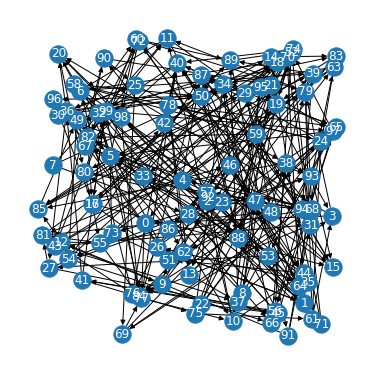

In [3]:
plot(B, V)

In [4]:
# Similartiy oracle
def sigma(u, v):
    return math.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)

In [5]:
def iterate():
    Bbar = defaultdict(set)
    for u, vs in B.items():
        for _, v in vs:
            Bbar[u].add(v)
            Bbar[v].add(u)

    for v in V:
        for u1 in Bbar[v]:
            for u2 in Bbar[u1]:
                if v == u2:
                    continue
                _, i = zip(*B[v])
                if u2 in i:
                    continue
                        
                l = sigma(V[v], V[u2])
                
                if -l < B[v][0][0]:
                    continue
                heapq.heapreplace(B[v], (-l, u2))

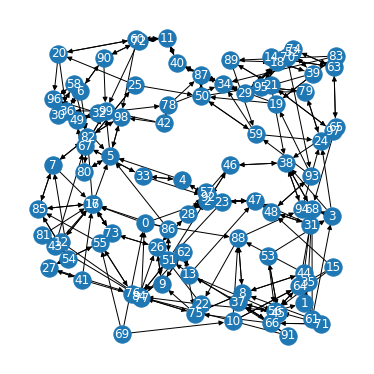

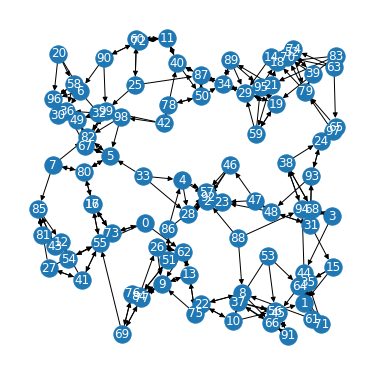

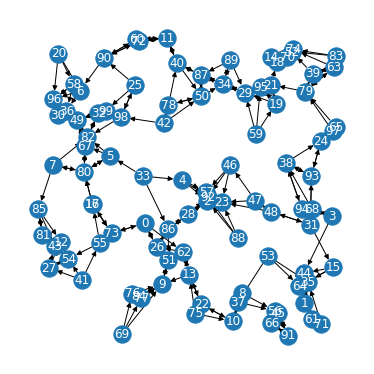

In [6]:
iterate()
plot(B, V)
iterate()
plot(B, V)
iterate()
plot(B, V)